# Step 0: Load The Data

In [4]:
#source py3/bin/activate
# Load pickled data
import pickle 

#needs to be opened by python 3 since pickle is from python 3
#remedy: tell it to use an earlier protocol(0,1 or 2)
# passing the data folder path
#'/home/hoof/Desktop/SessionTwo/data/train.p'
#'C:\Users\crc52_000\Dropbox\IntelligentOpenCVLessons\lessonTwo'
import os

training_file = r"C:\Users\crc52_000\Dropbox\IntelligentOpenCVLessons\lessonTwo\train.p"
print(training_file)
testing_file = r"C:\Users\crc52_000\Dropbox\IntelligentOpenCVLessons\lessonTwo\test.p"
print(testing_file)

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
    
x_train, y_train = train['features'], train['labels']
x_test, y_test = test['features'], test['labels']


n_classes = len(set(train['labels']))
x_train_split=x_train
y_train_split=y_train

print("Training Set Total:   {} samples".format(len(x_train)))


#The traffic sign data set dosen't come with data split therefore
#import sklearn model for splitting data into learninig traininig and validation
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix

#take 20% of data of the training set for testing(validation) 
n_test = x_test.shape[0]
x_train_split=x_train
y_train_split=y_train
x_train,x_validation,y_train, y_validation = train_test_split(x_train_split, y_train_split, test_size=0.2, random_state=0)

x_train = x_train.astype('float32')
x_validation = x_validation.astype('float32')
x_test= x_test.astype('float32')
x_train = x_train / 255 - 0.5
x_validation = x_validation / 255 - 0.5
x_test = x_test / 255 - 0.5

print("Updated image shape {}".format (x_train[0].shape))

print()
print("Training Set:   {} samples".format(len(x_train)))
print("Validation Set: {} samples".format(len(x_validation)))
print("Test Set:       {} samples".format(len(x_test)))
 

print("Number of classes =", n_classes)







C:\Users\crc52_000\Dropbox\IntelligentOpenCVLessons\lessonTwo\train.p
C:\Users\crc52_000\Dropbox\IntelligentOpenCVLessons\lessonTwo\test.p
Training Set Total:   39209 samples
Updated image shape (32, 32, 3)

Training Set:   31367 samples
Validation Set: 7842 samples
Test Set:       12630 samples
Number of classes = 43


# Step 1: Dataset Summary & Exploration

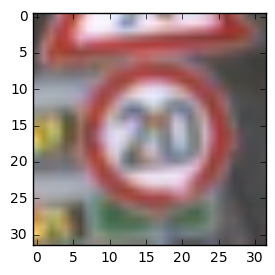

image number 0


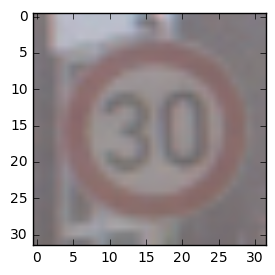

image number 1


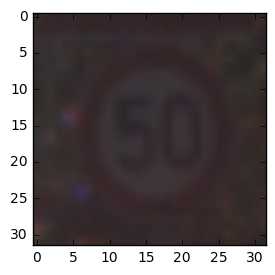

image number 2


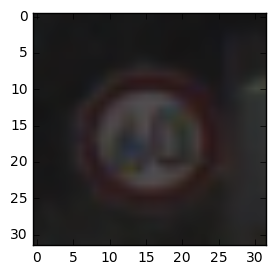

image number 3


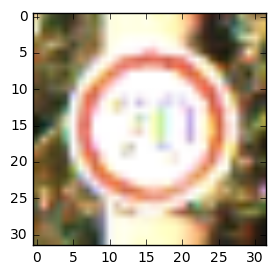

image number 4


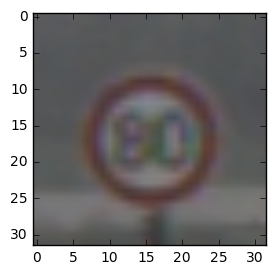

image number 5


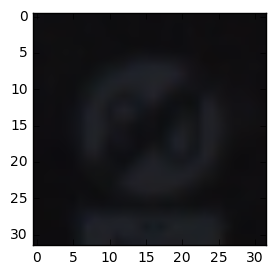

image number 6


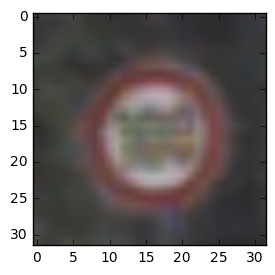

image number 7


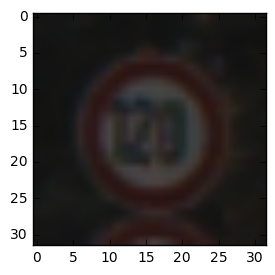

image number 8


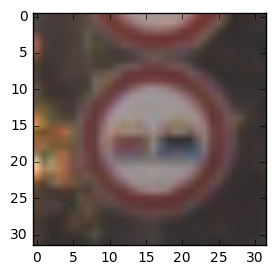

image number 9


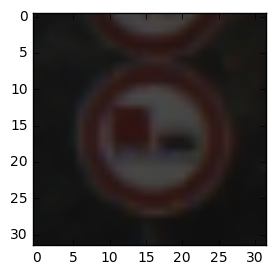

image number 10


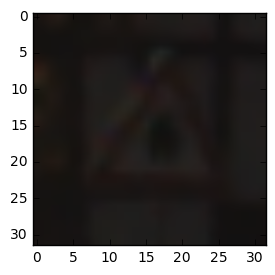

image number 11


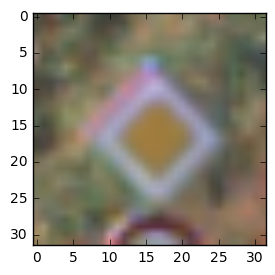

image number 12


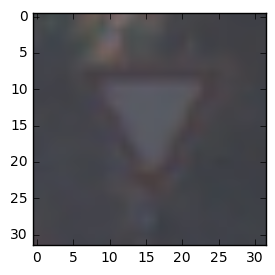

image number 13


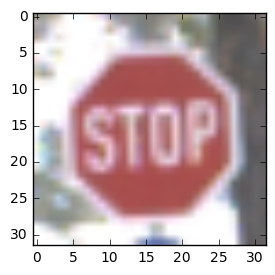

image number 14


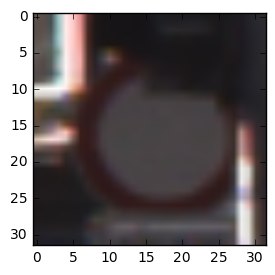

image number 15


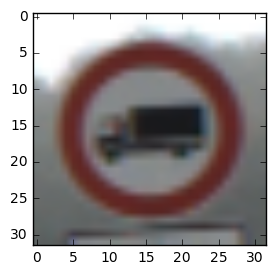

image number 16


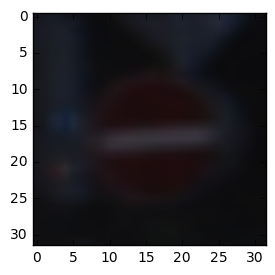

image number 17


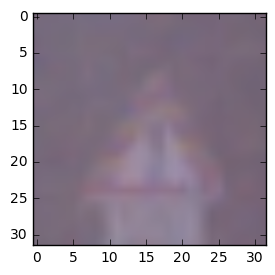

image number 18


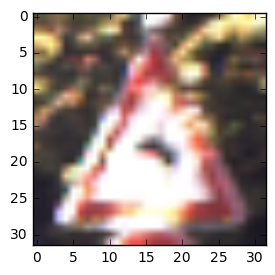

image number 19


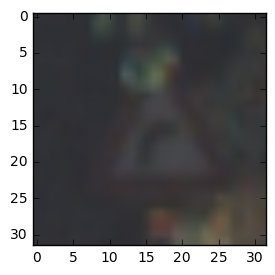

image number 20


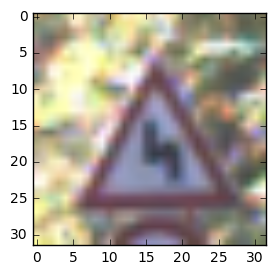

image number 21


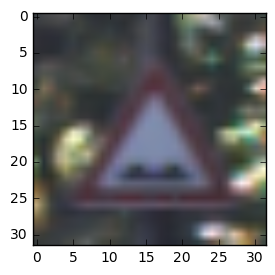

image number 22


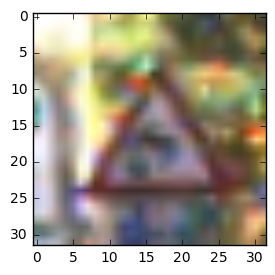

image number 23


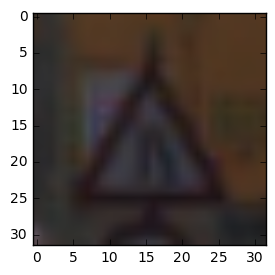

image number 24


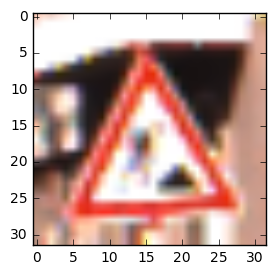

image number 25


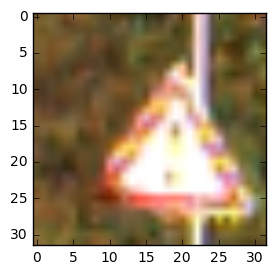

image number 26


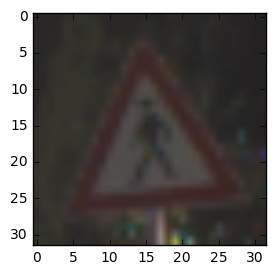

image number 27


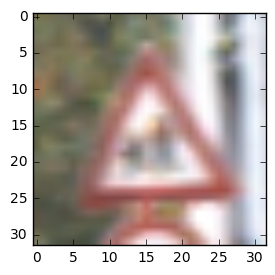

image number 28


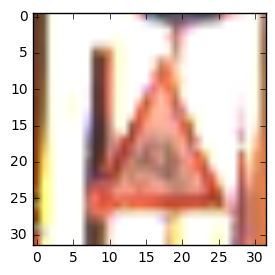

image number 29


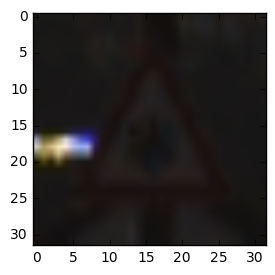

image number 30


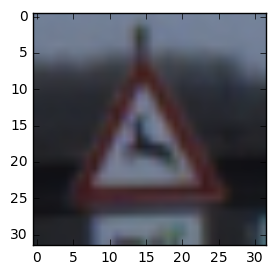

image number 31


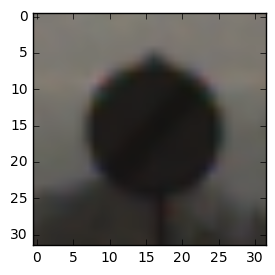

image number 32


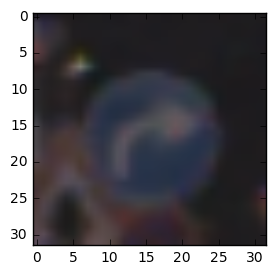

image number 33


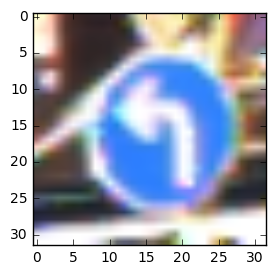

image number 34


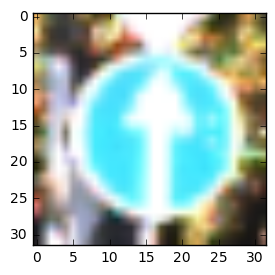

image number 35


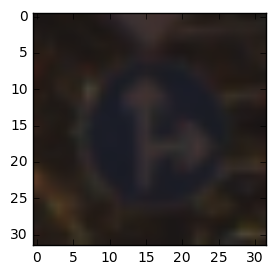

image number 36


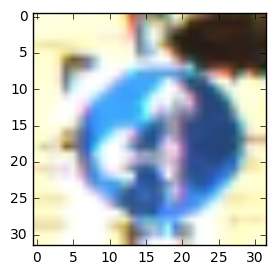

image number 37


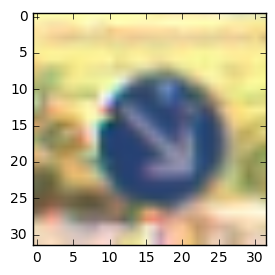

image number 38


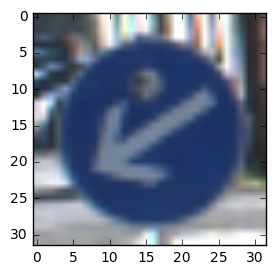

image number 39


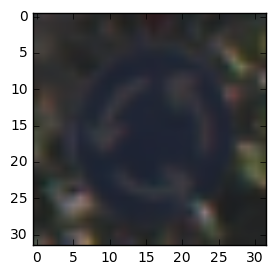

image number 40


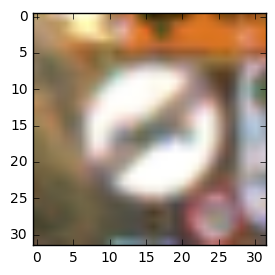

image number 41


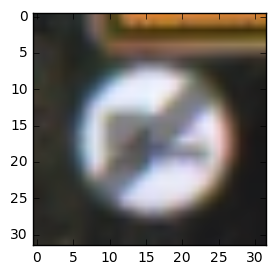

image number 42


In [5]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
#Visualize one sample and the corresponding class to verify dataare consistant

import jupyter

import random
import csv
import math
from tqdm import tqdm
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

 
    
###
for i in range(0, n_classes):
   image = train['features'][train['labels'] == i][5]
   plt.figure(figsize=(3,3))
   plt.imshow(image)
   plt.show()
   print('image number', i)
###





# exploratory visualization of the dataset

Count of ['Speed limit (20km/h)'] sign is 210 order is 0
Count of ['Speed limit (30km/h)'] sign is 2220 order is 1
Count of ['Speed limit (50km/h)'] sign is 2250 order is 2
Count of ['Speed limit (60km/h)'] sign is 1410 order is 3
Count of ['Speed limit (70km/h)'] sign is 1980 order is 4
Count of ['Speed limit (80km/h)'] sign is 1860 order is 5
Count of ['End of speed limit (80km/h)'] sign is 420 order is 6
Count of ['Speed limit (100km/h)'] sign is 1440 order is 7
Count of ['Speed limit (120km/h)'] sign is 1410 order is 8
Count of ['No passing'] sign is 1470 order is 9
Count of ['No passing for vehicles over 3.5 metric tons'] sign is 2010 order is 10
Count of ['Right-of-way at the next intersection'] sign is 1320 order is 11
Count of ['Priority road'] sign is 2100 order is 12
Count of ['Yield'] sign is 2160 order is 13
Count of ['Stop'] sign is 780 order is 14
Count of ['No vehicles'] sign is 630 order is 15
Count of ['Vehicles over 3.5 metric tons prohibited'] sign is 420 order is 16

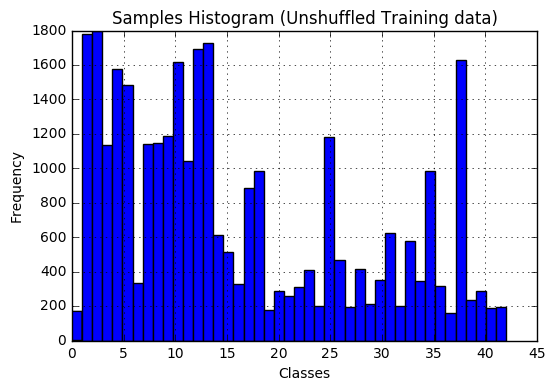

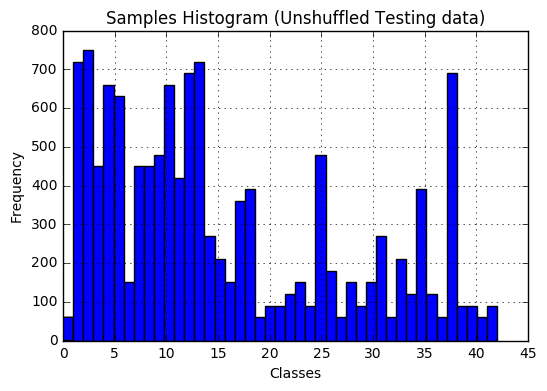

In [6]:
#Plot a histogram of data 
# excell file is included in the director
sign_names = {}
n_samples = []

#Open excel file and read its contents for the sign labels(meaning)
with open('signnames.csv', 'r') as file:
    read_file = csv.DictReader(file)
    for i in read_file:
        sign_names.setdefault(i['ClassId'],[]).append(i['SignName'])
#Itirate through the hist        

for i in range(0, n_classes):
    n_samples.append(len(train['features'][train['labels'] == i]))
    print("Count of", sign_names[str(i)], "sign is", n_samples[i], "order is", i)
    
plt.figure(1)
n_class_list, _, _ = plt.hist(y_train, n_classes)
plt.title("Samples Histogram (Unshuffled Training data)")
plt.xlabel("Classes")
plt.ylabel("Frequency")
plt.grid(True)

plt.figure(2)
plt.hist(y_test, n_classes)
plt.title("Samples Histogram (Unshuffled Testing data)")
plt.xlabel("Classes")
plt.ylabel("Frequency")
plt.grid(True)

plt.show()
#Itirate through the classes using box plot
#fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
# rectangular box plot
#bplot1 = axes[0].boxplot(all_data,
 #                        vert=True,   # vertical box aligmnent
#                       patch_artist=True)   # fill with color




# Design and Test a Model Architecture

In [8]:
#============================================================
#----------------------step II----------------------------
#============================================================

### Preprocess the data here.
### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle

x_train, y_train = shuffle(x_train, y_train)

### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed. Shuffling is required
### for better training the net.






# Model Architecture

In [18]:
#============================================================
#----------------------QUESTION 2----------------------------
#============================================================

### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf

EPOCHS = 16
BATCH_SIZE = 150


#Define methods 

from tensorflow.contrib.layers import flatten
mu = 0
sigma = 0.1
n_classes=43
layer_depth = {
    'layer_1': 6,
    'layer_2': 16,
    'fully_connected_1': 120,
    'fully_connected_2': 84,
    'fully_connected_logits': 43
}

# Store layers weight & bias
weights = {
    'layer_1': tf.Variable(tf.truncated_normal(
        [5, 5, 3, layer_depth['layer_1']],mean = mu, stddev = sigma)),
    'layer_2': tf.Variable(tf.truncated_normal(
        [5, 5, layer_depth['layer_1'], layer_depth['layer_2']],mean = mu, stddev = sigma)),
    'fully_connected_1': tf.Variable(tf.truncated_normal(
        [400,layer_depth['fully_connected_1']],mean = mu, stddev = sigma)),
    'fully_connected_2': tf.Variable(tf.truncated_normal(
        [layer_depth['fully_connected_1'],layer_depth['fully_connected_2']],mean = mu, stddev = sigma)),
    'out': tf.Variable(tf.truncated_normal(
        [layer_depth['fully_connected_2'], n_classes],mean = mu, stddev = sigma))
}
biases = {
    'layer_1': tf.Variable(tf.zeros(layer_depth['layer_1'])),
    'layer_2': tf.Variable(tf.zeros(layer_depth['layer_2'])),
    'fully_connected_1': tf.Variable(tf.zeros(layer_depth['fully_connected_1'])),
    'fully_connected_2': tf.Variable(tf.zeros(layer_depth['fully_connected_2'])),
    'out': tf.Variable(tf.zeros(n_classes))
}

def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='VALID')
    x = tf.nn.bias_add(x, b)
    return x
    #return tf.nn.tanh(x)
def maxpool2d(x, k=2):
    return tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1, k, k, 1],
        padding='SAME')


In [21]:
#============================================================
#----------------------QUESTION 3----------------------------
#============================================================

### Train your model here.
### Feel free to use as many code cells as needed.

 
def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1 
    dropout=0.55
 
# TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1 = conv2d(x, weights['layer_1'], biases['layer_1'] ) 
# TODO: Activation.
    conv1 = tf.nn.relu(conv1)
# TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1=maxpool2d(conv1)
# TODO: Layer 2: Convolutional. Output = 10x10x16.
    conv2 = conv2d(conv1, weights['layer_2'], biases['layer_2'] ) 
# TODO: Activation.
    conv2 = tf.nn.relu(conv2)
# TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2=maxpool2d(conv2)
# TODO: Flatten. Input = 5x5x16. Output = 400.
    fc1   = flatten(conv2)
# TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
 
    fc1 = tf.add(
        tf.matmul(fc1, weights['fully_connected_1']),
        biases['fully_connected_1'])
#fc1 = tf.nn.tanh(fc1)
# TODO: Activation.
    fc1 = tf.nn.relu(fc1)
# Drop_out
    fc1 = tf.nn.dropout(fc1, dropout) 
# TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2 = tf.add(
        tf.matmul(fc1, weights['fully_connected_2']),
        biases['fully_connected_2'])
#fc2 = tf.nn.tanh(fc2)
# TODO: Activation.
    fc2 = tf.nn.relu(fc2)
    # Drop_out
    fc2 = tf.nn.dropout(fc2, dropout) 
# TODO: Layer 5: Fully Connected. Input = 84. Output = 10.
    logits = tf.add(
        tf.matmul(fc2, weights['out']),
        biases['out'])
#logits = tf.nn.tanh(logits)
    return logits




#Place holder for patches, which is initialized to none in order to accept any patch size
#y stores our labels who come with sparse value
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))

#one hot encode the labels
one_hot_y = tf.one_hot(y, 43)


#The pipeline is as follows
#how queckly to update the network weights
rate = 0.001

logits = LeNet(x)
###
prediction = tf.nn.softmax(logits)#here i use softmax, later on i will feed the new images using this
cross_entropy = -tf.reduce_sum(one_hot_y * tf.log(prediction + 1e-6), reduction_indices=1)
loss = tf.reduce_mean(cross_entropy)
###



#tis line will be used for test data without labels
#prediction = tf.nn.softmax(logits)
#train the logits and compare them to the ground truth hot encoded labels
#cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
#Cross-entropy avereging from all images
#loss_operation = tf.reduce_mean(cross_entropy)
#Adam Optimizer to mimimize the loss 
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
#path propagation to update the network
#training_operation = optimizer.minimize(loss_operation)

training_operation = optimizer.minimize(loss)

#This section of the code was adopted form the SDC course, traffic sign recognition
#Compare the logit prediction to the one-hot encoded ground truth label 
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))

#Average individual prediction accuraccies to get the overall accuracy
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
# create patches and run them 
def evaluate(x_data, y_data):
    num_examples = len(x_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = x_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples



# Train, Validate and Test the Model

In [22]:
#============================================================
#----------------------QUESTION 5----------------------------
#============================================================

#This section of the code was adopted form the SDC course, traffic sign recognition
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    #sess.run(tf.initialize_all_variables())
    num_examples = len(x_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        x_train, y_train = shuffle(x_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = x_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(x_validation, y_validation)
        print("=============")
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy after Training = {:.3f}".format(validation_accuracy))
        print()
        
    try:
        saver
    except NameError:
        saver = tf.train.Saver()
    saver.save(sess, './lenet')
    
    print("Model saved")


#Test the performance of the model on the 20% of traffic signs that we have splitted 

with tf.Session() as sess:
    loader = tf.train.import_meta_graph('lenet.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))

    test_accuracy = evaluate(x_test, y_test)
    len_x_test=len(x_test)
    prediction=test_accuracy * len_x_test
    print("Test Accuracy = {:.3f}".format(test_accuracy))





Training...

EPOCH 1 ...
Validation Accuracy after Training = 0.429

EPOCH 2 ...
Validation Accuracy after Training = 0.610

EPOCH 3 ...
Validation Accuracy after Training = 0.732

EPOCH 4 ...
Validation Accuracy after Training = 0.774

EPOCH 5 ...
Validation Accuracy after Training = 0.819

EPOCH 6 ...
Validation Accuracy after Training = 0.844

EPOCH 7 ...
Validation Accuracy after Training = 0.851

EPOCH 8 ...
Validation Accuracy after Training = 0.883

EPOCH 9 ...
Validation Accuracy after Training = 0.872

EPOCH 10 ...
Validation Accuracy after Training = 0.899

EPOCH 11 ...
Validation Accuracy after Training = 0.902

EPOCH 12 ...
Validation Accuracy after Training = 0.915

EPOCH 13 ...
Validation Accuracy after Training = 0.917

EPOCH 14 ...
Validation Accuracy after Training = 0.920

EPOCH 15 ...
Validation Accuracy after Training = 0.926

EPOCH 16 ...
Validation Accuracy after Training = 0.930

Model saved


FailedPreconditionError: Attempting to use uninitialized value Variable_31
	 [[Node: Variable_31/read = Identity[T=DT_FLOAT, _class=["loc:@Variable_31"], _device="/job:localhost/replica:0/task:0/cpu:0"](Variable_31)]]

Caused by op 'Variable_31/read', defined at:
  File "C:\Users\crc52_000\Anaconda3\lib\runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\crc52_000\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\crc52_000\Anaconda3\lib\site-packages\ipykernel\__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "C:\Users\crc52_000\Anaconda3\lib\site-packages\traitlets\config\application.py", line 653, in launch_instance
    app.start()
  File "C:\Users\crc52_000\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "C:\Users\crc52_000\Anaconda3\lib\site-packages\zmq\eventloop\ioloop.py", line 162, in start
    super(ZMQIOLoop, self).start()
  File "C:\Users\crc52_000\Anaconda3\lib\site-packages\tornado\ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "C:\Users\crc52_000\Anaconda3\lib\site-packages\tornado\stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\crc52_000\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "C:\Users\crc52_000\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Users\crc52_000\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "C:\Users\crc52_000\Anaconda3\lib\site-packages\tornado\stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Users\crc52_000\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Users\crc52_000\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Users\crc52_000\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "C:\Users\crc52_000\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\crc52_000\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\crc52_000\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\crc52_000\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Users\crc52_000\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-18-f211c03538be>", line 31, in <module>
    [5, 5, 3, layer_depth['layer_1']],mean = mu, stddev = sigma)),
  File "C:\Users\crc52_000\Anaconda3\lib\site-packages\tensorflow\python\ops\variables.py", line 226, in __init__
    expected_shape=expected_shape)
  File "C:\Users\crc52_000\Anaconda3\lib\site-packages\tensorflow\python\ops\variables.py", line 344, in _init_from_args
    self._snapshot = array_ops.identity(self._variable, name="read")
  File "C:\Users\crc52_000\Anaconda3\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 1490, in identity
    result = _op_def_lib.apply_op("Identity", input=input, name=name)
  File "C:\Users\crc52_000\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 763, in apply_op
    op_def=op_def)
  File "C:\Users\crc52_000\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 2395, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "C:\Users\crc52_000\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1264, in __init__
    self._traceback = _extract_stack()

FailedPreconditionError (see above for traceback): Attempting to use uninitialized value Variable_31
	 [[Node: Variable_31/read = Identity[T=DT_FLOAT, _class=["loc:@Variable_31"], _device="/job:localhost/replica:0/task:0/cpu:0"](Variable_31)]]


# Test a Model on New Images

Loading Image 1


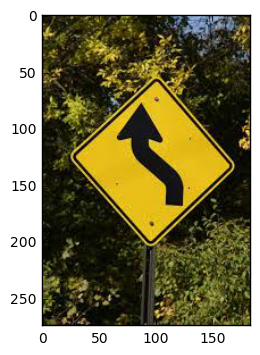

Loading Image 2


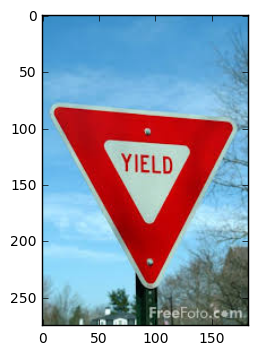

Loading Image 3


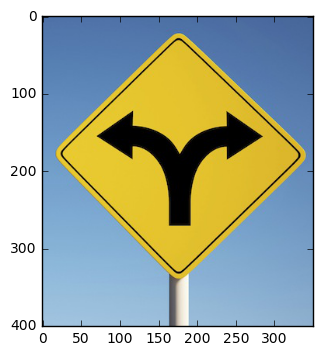

Loading Image 4


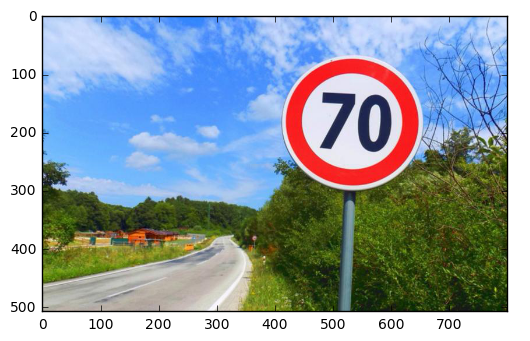

Loading Image 5


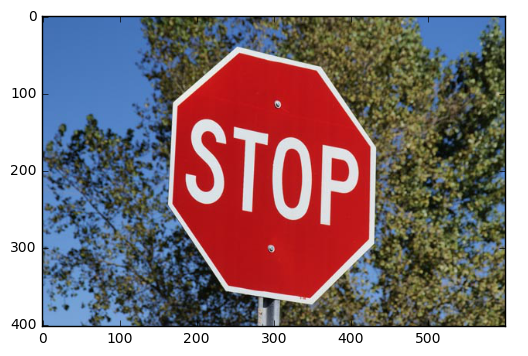

Loading Image 6


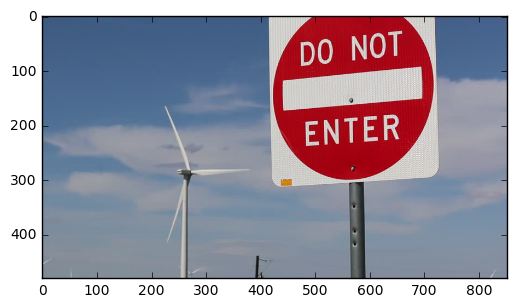

Loading Image 7


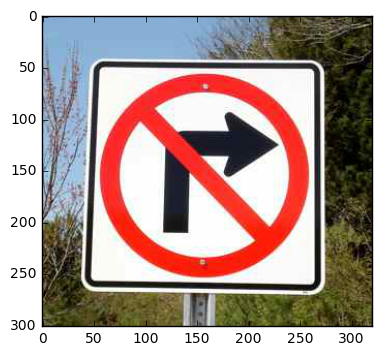

Loading Image 8


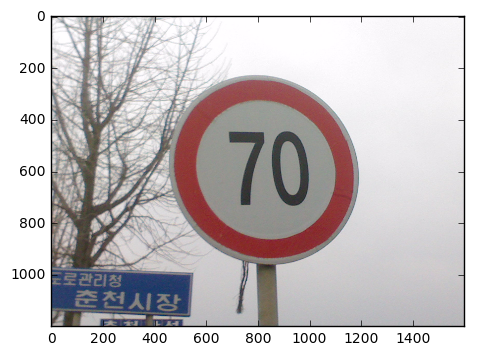

Loading Image 9


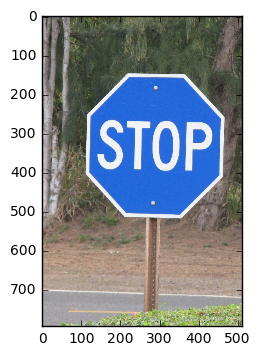

Loading Image 10


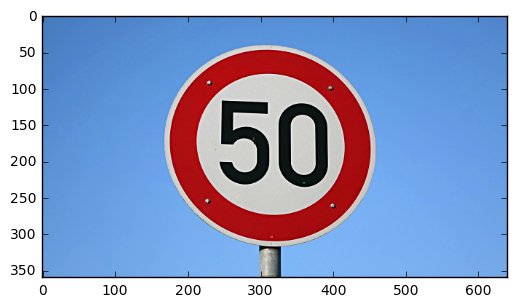

shape of the real image (10, 32, 32, 3)


In [27]:
#============================================================
#----------------------strep III----------------------------
#============================================================


import cv2
import matplotlib.pyplot as plt
import numpy as np
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
real_imgs = []
for i in range(1, 11):
    print("Loading Image", i)
    img=cv2.imread('question3/test_sign_{}.jpg'.format(str(i)))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    img = img  / 255 - 0.5 #normalize
    resize_img = cv2.resize(img, (32, 32))
    resize_img = np.reshape(np.asarray(resize_img), [32, 32, 3])
    real_imgs.append(resize_img)
    plt.show()
                
real_imgs = np.asarray(real_imgs)

print("shape of the real image", real_imgs.shape)


In [28]:
#============================================================
#----------------------QUESTION ----------------------------
#============================================================

### Run the predictions here.
### Feel free to use as many code cells as needed.
#new_prediction=tf.placeholder(tf.float32,(5,32,32,3) )

#logits=LeNet(initial_real_presictions)
import tensorflow as tf 
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    #sess.run(tf.global_variables_initializer())
    loader_2 = tf.train.import_meta_graph('lenet.meta')
    loader_2.restore(sess, tf.train.latest_checkpoint('./'))
     
    #new_predictions = sess.run(prediction, feed_dict={x: real_imgs})
    new_prediction = sess.run(prediction, feed_dict={x: real_imgs})


print(new_prediction)



Instructions for updating:
Use `tf.global_variables_initializer` instead.
[[ 0.03671482  0.02919325  0.02111527  0.01815837  0.01786467  0.0215075
   0.01526415  0.02207803  0.02263631  0.0318367   0.0267596   0.02296243
   0.0235386   0.02500213  0.02266644  0.01728042  0.02959859  0.02080326
   0.01995592  0.01421396  0.03967269  0.02443181  0.01470901  0.02352062
   0.03725915  0.02524541  0.03809617  0.02921389  0.02427999  0.01833985
   0.0175899   0.02133278  0.01987774  0.01616905  0.02011097  0.01722151
   0.02120236  0.02057208  0.02286766  0.01715064  0.02326848  0.02151556
   0.02720231]
 [ 0.02172348  0.02990969  0.01544542  0.01855748  0.01585369  0.02544799
   0.02598272  0.02242654  0.02254039  0.01234747  0.02314536  0.02723536
   0.02905569  0.01990118  0.02761975  0.01734525  0.0212754   0.01448636
   0.02868992  0.02149669  0.03154942  0.04288375  0.04045782  0.01816167
   0.02127687  0.01359633  0.02893662  0.02083404  0.01489956  0.02086126
   0.01838446  0.0172949

In [29]:
#============================================================
#----------------------QUESTION ----------------------------
#============================================================


### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
max_value = np.argmax(new_prediction[0])
print(max_value)  

max_value = np.argmax(new_prediction[1])
print(max_value) 

max_value = np.argmax(new_prediction[2])
print(max_value)  

max_value = np.argmax(new_prediction[3])
print(max_value) 

max_value = np.argmax(new_prediction[4])
print(max_value)  

max_value = np.argmax(new_prediction[5])
print(max_value)  

max_value = np.argmax(new_prediction[6])
print(max_value)




20
21
29
22
40
23
8


In [30]:
#============================================================
#----------------------QUESTION 9----------------------------
#============================================================

with tf.Session() as sess:
    #probabilities = tf.nn.top_k(new_predictions, k=5)

#values, indices = sess.run(probabilities)
    values, indices = sess.run(tf.nn.top_k(new_prediction, 5))
    for i in range(0, 5):
        for j in range(0, 7):
            print(sign_names[str(indices[j][i])], values[j][i])
        print("\n")
    
    
    #sess.run(tf.initialize_all_variables())
    #print(sess.run(tf.nn.top_k(new_predictions, 5), feed_dict={x: real_imgs}))



['Dangerous curve to the right'] 0.0396727
['Double curve'] 0.0428837
['Bicycles crossing'] 0.0350074
['Bumpy road'] 0.0340346
['Roundabout mandatory'] 0.0385667
['Slippery road'] 0.0397616
['Speed limit (120km/h)'] 0.0433578


['Traffic signals'] 0.0380962
['Bumpy road'] 0.0404578
['Double curve'] 0.0347044
['Keep left'] 0.0338381
['Speed limit (120km/h)'] 0.0341477
['Double curve'] 0.0369758
['End of no passing'] 0.0411868


['Road narrows on the right'] 0.0372592
['Go straight or left'] 0.0366764
['Ahead only'] 0.0334628
['Roundabout mandatory'] 0.0334439
['Slippery road'] 0.0338212
['Speed limit (20km/h)'] 0.0328545
['Keep left'] 0.0387621


['Speed limit (20km/h)'] 0.0367148
['Dangerous curve to the right'] 0.0315494
['Roundabout mandatory'] 0.0316039
['Go straight or right'] 0.0323814
['Speed limit (30km/h)'] 0.0338054
['Roundabout mandatory'] 0.032706
['Traffic signals'] 0.0347361


['No passing'] 0.0318367
['Speed limit (30km/h)'] 0.0299097
['Speed limit (120km/h)'] 0.0309801
[